In [106]:
# Import All libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing  import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [63]:
df = pd.read_csv("Census Income.csv")

In [11]:
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [12]:
df.tail()

Age      Workclass  Fnlwgt    Education  Education_num  \
32555   27        Private  257302   Assoc-acdm             12   
32556   40        Private  154374      HS-grad              9   
32557   58        Private  151910      HS-grad              9   
32558   22        Private  201490      HS-grad              9   
32559   52   Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation Relationship    Race      Sex  \
32555   Married-civ-spouse        Tech-support         Wife   White   Female   
32556   Married-civ-spouse   Machine-op-inspct      Husband   White     Male   
32557              Widowed        Adm-clerical    Unmarried   White   Female   
32558        Never-married        Adm-clerical    Own-child   White     Male   
32559   Married-civ-spouse     Exec-managerial         Wife   White   Female   

       Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
32555             0             0              38   United-States   <=50K  
32556             0             0              40   United-States    >50K  
32557             0             0              40   United-States   <=50K  
32558             0             0              20   United-States   <=50K  
32559         15024             0              40   United-States    >50K

In [13]:
df.shape

(32560, 15)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

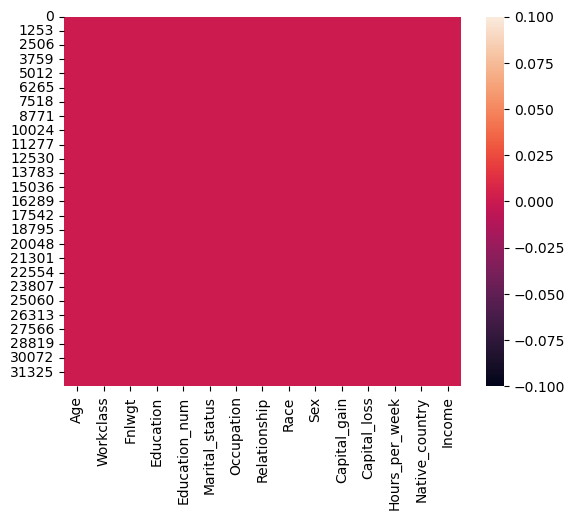

In [16]:
sns.heatmap(df.isnull())

In [18]:
df.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [19]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

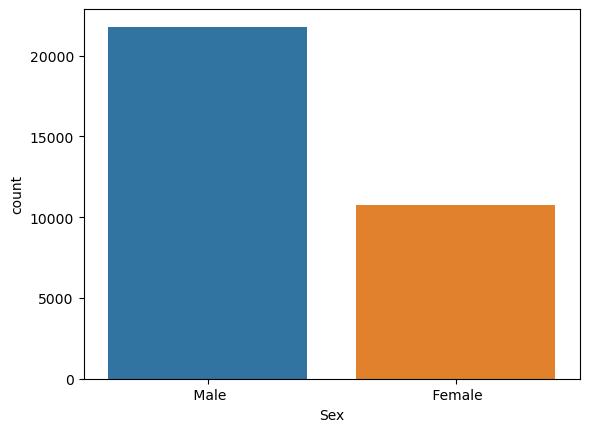

In [20]:
sns.countplot('Sex',data=df)

In [23]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [24]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [26]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [27]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [88]:
df = df.drop(['Education','Fnlwgt'],axis=1)

In [68]:
# Number of records where individual's income is more than $50,000
n_greater_50k = df[df['Income'] == ' <=50K'].shape[0]
print("Individuals making more than $50k: {}".format(n_greater_50k))

Individuals making more than $50k: 24719


In [29]:
df.head()

Age          Workclass  Education_num       Marital_status  \
0   50   Self-emp-not-inc             13   Married-civ-spouse   
1   38            Private              9             Divorced   
2   53            Private              7   Married-civ-spouse   
3   28            Private             13   Married-civ-spouse   
4   37            Private             14   Married-civ-spouse   

           Occupation    Relationship    Race      Sex  Capital_gain  \
0     Exec-managerial         Husband   White     Male             0   
1   Handlers-cleaners   Not-in-family   White     Male             0   
2   Handlers-cleaners         Husband   Black     Male             0   
3      Prof-specialty            Wife   Black   Female             0   
4     Exec-managerial            Wife   White   Female             0   

   Capital_loss  Hours_per_week  Native_country  Income  
0             0              13   United-States   <=50K  
1             0              40   United-States   <=50K  
2             0              40   United-States   <=50K  
3             0              40            Cuba   <=50K  
4             0              40   United-States   <=50K

# Replace?with NAN

In [30]:
df.replace('?',np.NaN,inplace=True)

In [31]:
df.head()

Age          Workclass  Education_num       Marital_status  \
0   50   Self-emp-not-inc             13   Married-civ-spouse   
1   38            Private              9             Divorced   
2   53            Private              7   Married-civ-spouse   
3   28            Private             13   Married-civ-spouse   
4   37            Private             14   Married-civ-spouse   

           Occupation    Relationship    Race      Sex  Capital_gain  \
0     Exec-managerial         Husband   White     Male             0   
1   Handlers-cleaners   Not-in-family   White     Male             0   
2   Handlers-cleaners         Husband   Black     Male             0   
3      Prof-specialty            Wife   Black   Female             0   
4     Exec-managerial            Wife   White   Female             0   

   Capital_loss  Hours_per_week  Native_country  Income  
0             0              13   United-States   <=50K  
1             0              40   United-States   <=50K  
2             0              40   United-States   <=50K  
3             0              40            Cuba   <=50K  
4             0              40   United-States   <=50K

In [32]:
df.fillna(method = 'ffill',inplace = True)

# Label Encoding 

In [78]:
le = LabelEncoder()
df['Workclass']=le.fit_transform(df['Workclass'])
df['Marital_status'] = le.fit_transform(df['Marital_status'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Relationship'] = le.fit_transform(df['Relationship'])
df['Race'] = le.fit_transform(df['Race'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Native_country'] = le.fit_transform(df['Native_country'])
df['Income'] = le.fit_transform(df['Income'])

In [79]:
df.head()

Age  Workclass  Fnlwgt   Education  Education_num  Marital_status  \
0   50          6   83311   Bachelors             13               2   
1   38          4  215646     HS-grad              9               0   
2   53          4  234721        11th              7               2   
3   28          4  338409   Bachelors             13               2   
4   37          4  284582     Masters             14               2   

   Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0           4             0     4    1             0             0   
1           6             1     4    1             0             0   
2           6             0     2    1             0             0   
3          10             5     2    0             0             0   
4           4             5     4    0             0             0   

   Hours_per_week  Native_country  Income  
0              13              39       0  
1              40              39       0  
2              40              39       0  
3              40               5       0  
4              40              39       0

# People With more age earns more 

In [80]:
sns.barplot(x= 'Income',y = 'Age',data=df)

<AxesSubplot:xlabel='Income', ylabel='Age'>

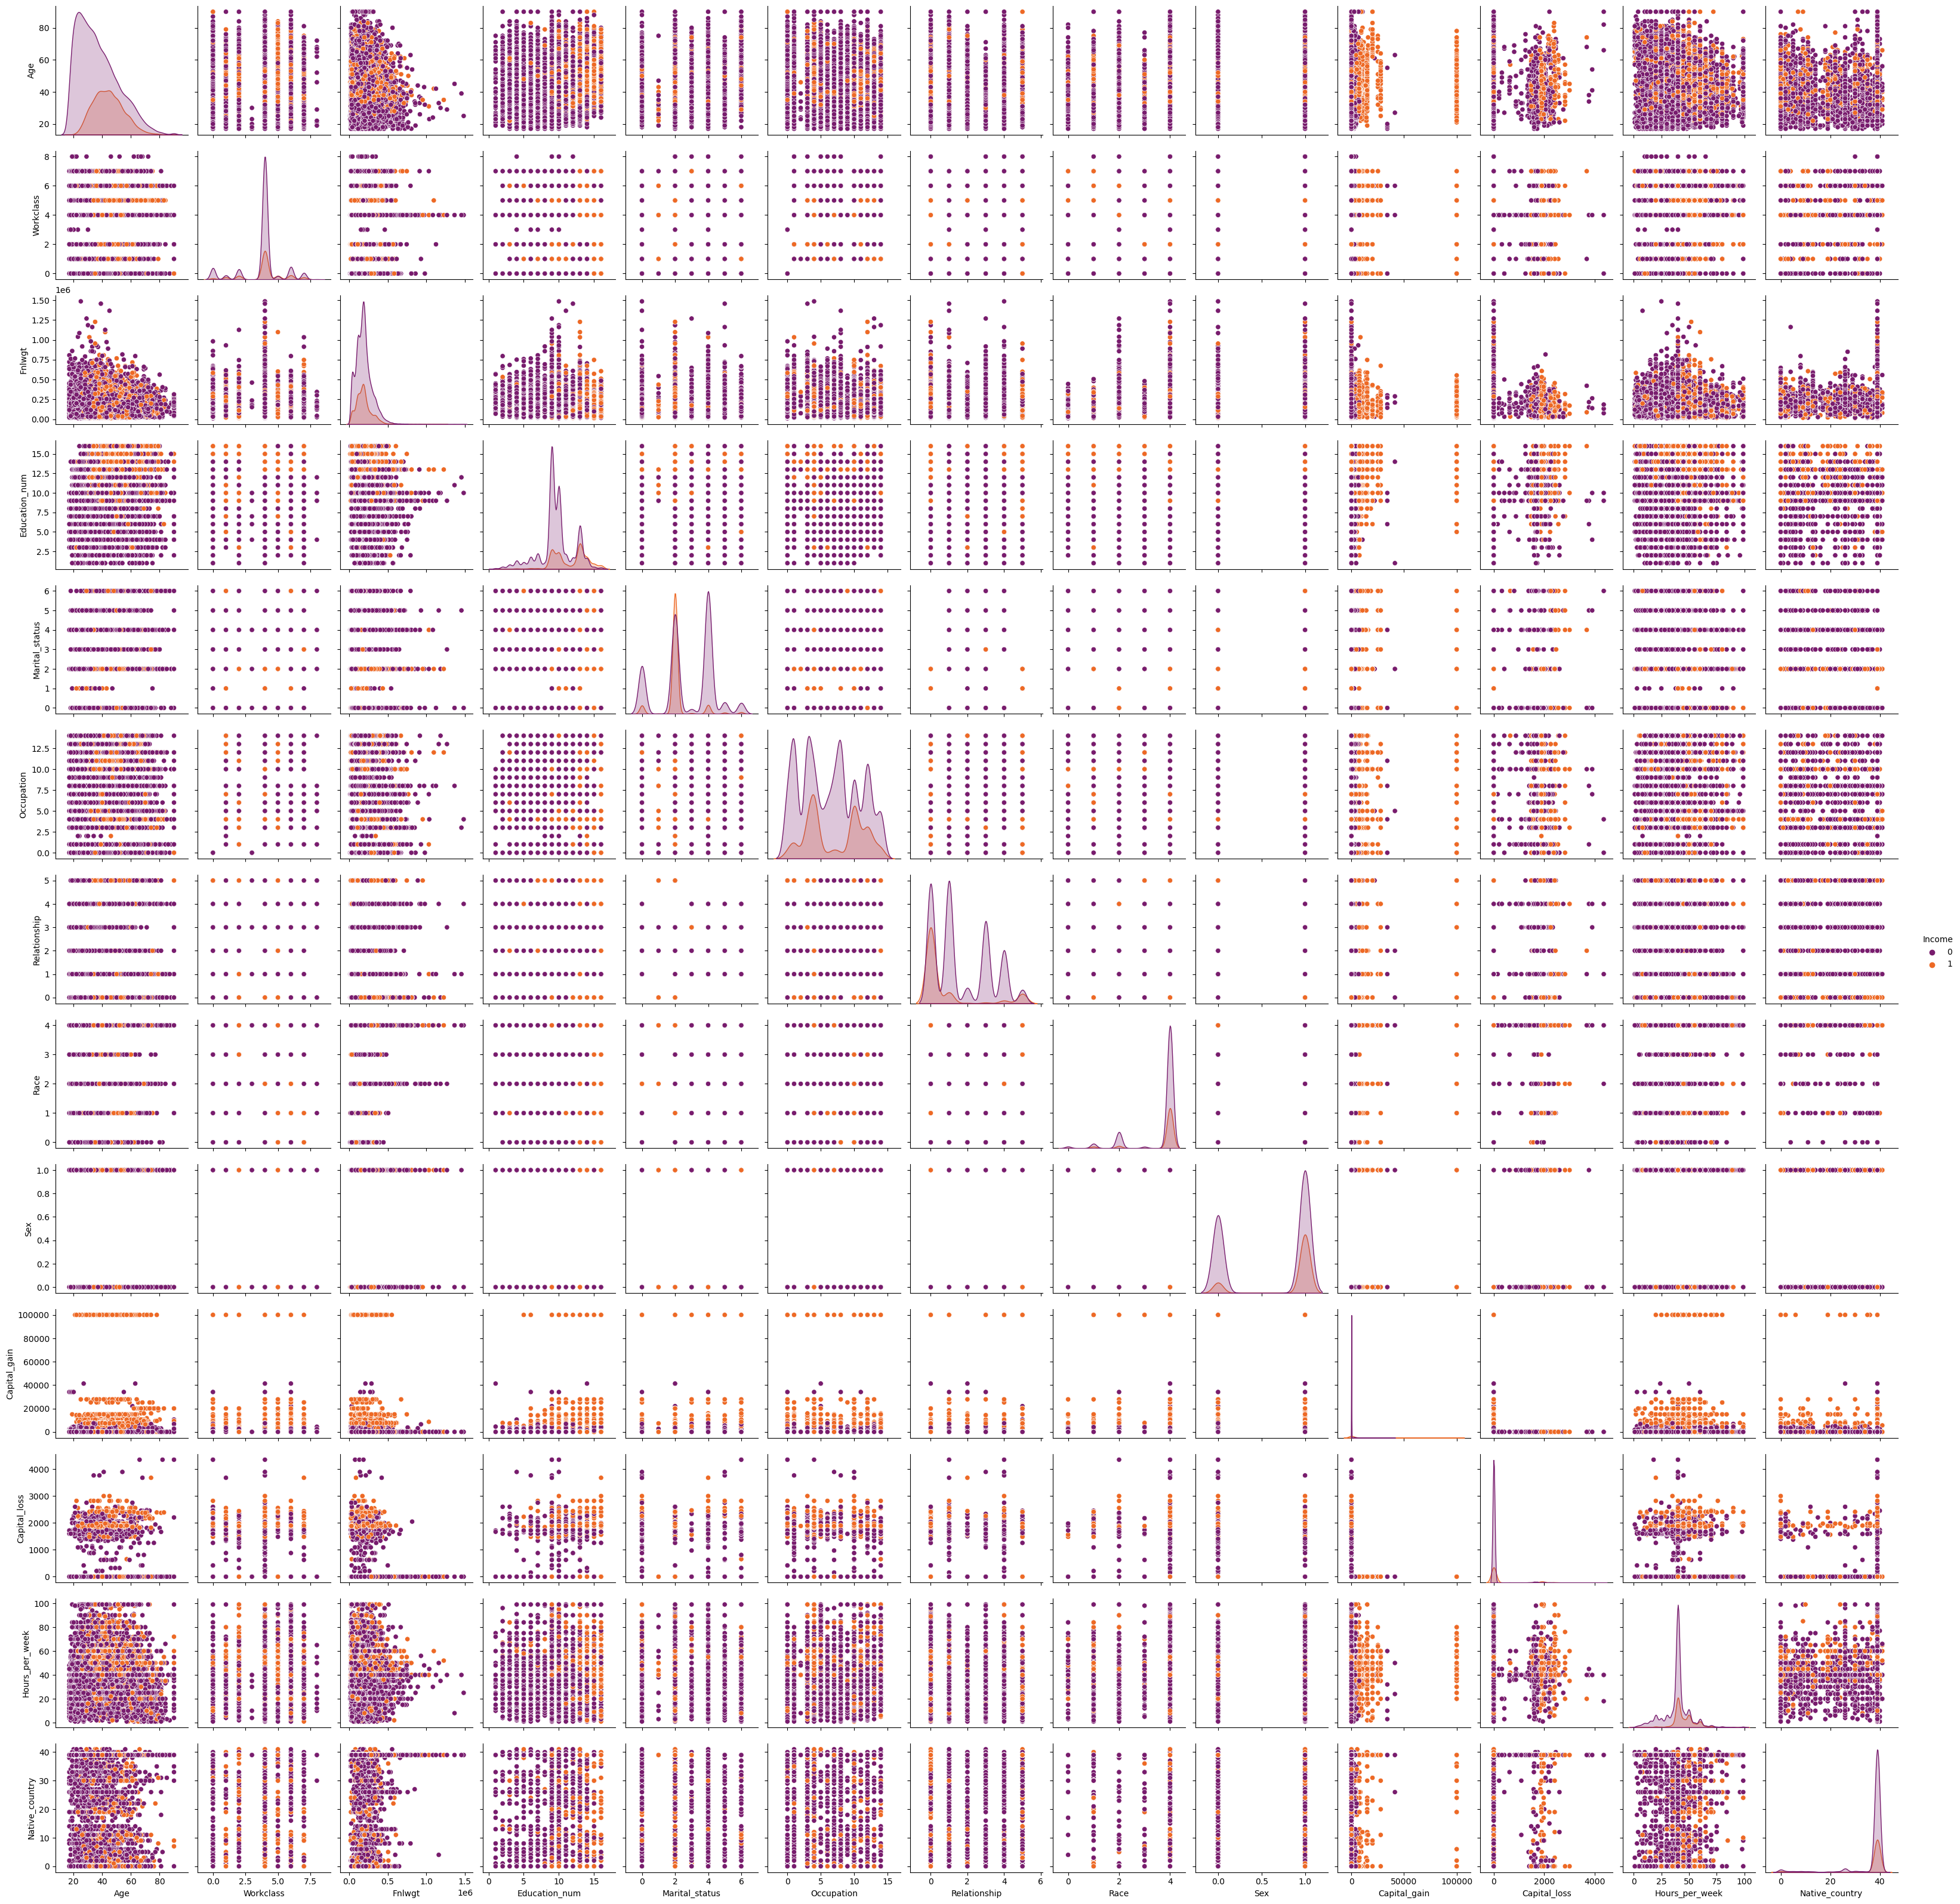

In [81]:
sns.pairplot(df,hue = 'Income',palette = 'inferno' )

In [82]:
plt.figure(figsize= (15,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

In [83]:
df.describe()

Age     Workclass        Fnlwgt  Education_num  \
count  32560.000000  32560.000000  3.256000e+04   32560.000000   
mean      38.581634      3.868796  1.897818e+05      10.080590   
std       13.640642      1.455879  1.055498e+05       2.572709   
min       17.000000      0.000000  1.228500e+04       1.000000   
25%       28.000000      4.000000  1.178315e+05       9.000000   
50%       37.000000      4.000000  1.783630e+05      10.000000   
75%       48.000000      4.000000  2.370545e+05      12.000000   
max       90.000000      8.000000  1.484705e+06      16.000000   

       Marital_status    Occupation  Relationship          Race           Sex  \
count    32560.000000  32560.000000  32560.000000  32560.000000  32560.000000   
mean         2.611794      6.572912      1.446376      3.665848      0.669195   
std          1.506225      4.228809      1.606794      0.848817      0.470510   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          2.000000      3.000000      0.000000      4.000000      0.000000   
50%          2.000000      7.000000      1.000000      4.000000      1.000000   
75%          4.000000     10.000000      3.000000      4.000000      1.000000   
max          6.000000     14.000000      5.000000      4.000000      1.000000   

       Capital_gain  Capital_loss  Hours_per_week  Native_country  \
count  32560.000000  32560.000000    32560.000000    32560.000000   
mean    1077.615172     87.306511       40.437469       36.718796   
std     7385.402999    402.966116       12.347618        7.823892   
min        0.000000      0.000000        1.000000        0.000000   
25%        0.000000      0.000000       40.000000       39.000000   
50%        0.000000      0.000000       40.000000       39.000000   
75%        0.000000      0.000000       45.000000       39.000000   
max    99999.000000   4356.000000       99.000000       41.000000   

             Income  
count  32560.000000  
mean       0.240817  
std        0.427586  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [90]:
x = df.drop(['Income'], axis = 1)
y = df['Income']

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state=42)

In [ ]:
# Initializing the GaussianNB

In [98]:
gb = GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [99]:
y_pred = gb.predict(x_test)

In [102]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      4912
           1       0.71      0.33      0.45      1600

    accuracy                           0.80      6512
   macro avg       0.76      0.64      0.66      6512
weighted avg       0.79      0.80      0.77      6512

[[4693  219]
 [1075  525]]
80.12899262899262


In [ ]:
# Initializing the LinearRegression


In [107]:
linear_model = LinearRegression()


In [108]:
linear_model.fit(x_train, y_train)


LinearRegression()

In [109]:
y_pred = linear_model.predict(x_test)

In [110]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.13745943115262904


In [117]:
# Initializing the Decision Tree classifier


In [112]:
tree_classifier = DecisionTreeClassifier(random_state=42)

In [113]:
tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [115]:
y_pred = tree_classifier.predict(x_test)


In [116]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8141891891891891


In [118]:
# Initializing the k-Nearest Neighbors classifier with k=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Training the classifier on the training data
knn_classifier.fit(x_train, y_train)

# Making predictions on the testing data
y_pred = knn_classifier.predict(x_test)

# Evaluating the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8450552825552825


In [ ]:
# Initializing the Support Vector Classifier (SVC)
svc_classifier = SVC(kernel='linear', random_state=42)  # Linear kernel is used here, you can try other kernels as well

# Training the classifier on the training data
svc_classifier.fit(x_train, y_train)

# Making predictions on the testing data

y_pred = svc_classifier.predict(x_test)

# Evaluating the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)